In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set(rc={'figure.figsize': (11,4)})

In [8]:
df = pd.read_csv('Data/Haifa-Atzmaut.csv')
station_name = df.columns[0]
df = df.drop(columns=[station_name])
df = df.rename(columns={colname: colname.strip() for colname in df.columns})
df = df.rename(columns={df.columns[-1]: 'DateTime'})
df['DateTime'] = df['DateTime'].apply(lambda x: x.strip().replace('24:00', '00:00'))
pollutants = list(df)
pollutants.remove('DateTime')
units = {colname: df.loc[0, colname].strip() for colname in pollutants}
df = df.iloc[1:-8]  # Last 8 rows are summary statistics by the EPA, first row is units of measurement
df[pollutants] = df[pollutants].apply(pd.to_numeric, errors='coerce').clip(0)
df['DateTime'] = pd.to_datetime(df['DateTime'],infer_datetime_format=True)
df = df.set_index('DateTime')

df.loc["2019-04":"2019-05"]

,SO2,Benzene,PM2.5,PM10,CO,NO2,NOX,NO
DateTime,,,,,,,,
2019-04-01 00:05:00,0.0,0.06,0.4,NaN,0.2,6.1,5.5,0.0
2019-04-01 00:10:00,0.0,0.06,2.3,NaN,0.2,5.8,6.5,0.3
2019-04-01 00:15:00,NaN,0.04,2.4,NaN,0.2,12.6,12.5,0.0
2019-04-01 00:20:00,NaN,0.04,3.5,NaN,0.2,4.4,4.3,0.0
2019-04-01 00:25:00,NaN,0.04,2.5,NaN,0.2,3.9,3.9,0.1
...,...,...,...,...,...,...,...,...
2019-05-31 23:40:00,0.0,0.09,19.0,NaN,0.3,NaN,NaN,NaN
2019-05-31 23:45:00,0.0,0.06,18.9,NaN,0.3,NaN,NaN,NaN
2019-05-31 23:50:00,0.0,0.06,15.0,NaN,0.3,NaN,NaN,NaN


In [9]:
df['Date'] = df.index.date  # remove later if unused
df['Weekday Name'] = df.index.day_name()
df['Weekday Name'].value_counts()

Sunday       126420
Saturday     126145
Monday       126144
Friday       126144
Tuesday      126144
Wednesday    126144
Thursday     126144
Name: Weekday Name, dtype: int64

In [4]:
df.describe()

,Benzene,PM2.5,CO,NO2,NO,NOX
count,460910.00000,807572.000000,836016.000000,826737.000000,826501.000000,826501.000000
mean,0.30451,20.746486,0.373459,20.890972,15.940971,36.658834
std,0.31537,21.750385,0.279959,14.663960,32.244695,43.021879
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.12000,10.900000,0.200000,9.200000,0.700000,11.200000
50%,0.22000,17.300000,0.300000,17.800000,4.900000,23.700000
75%,0.37000,26.000000,0.500000,29.700000,15.900000,45.100000
max,10.31000,739.700000,12.300000,215.800000,754.900000,854.400000


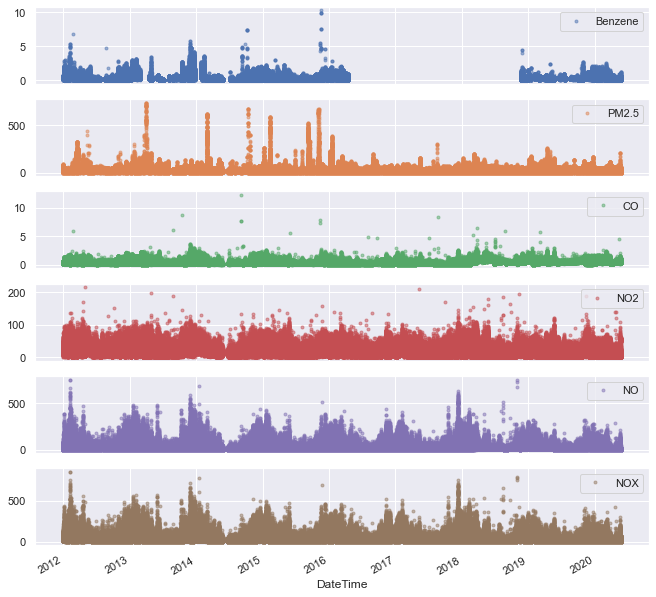

In [5]:
axes=df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 11), subplots=True);

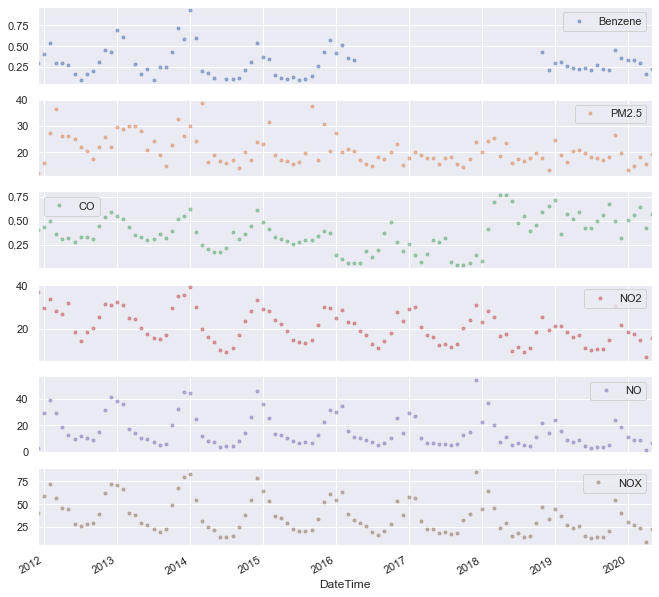

In [6]:
# Pollutants averaged by month
df.groupby(pd.Grouper(freq='M')).mean().plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 11), subplots=True);

#### Warning: many outliers are cropped

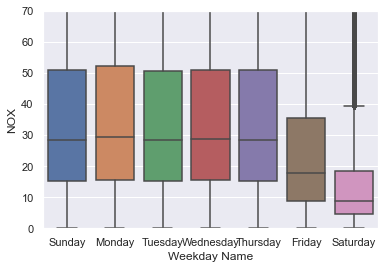

In [7]:
# Pollutants vs weekday
# Find a better way to set the x axis ordering..
ax = sns.boxplot(data=df, x='Weekday Name', y='NOX', 
                 order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
ax.set_ylim([0,70]);